In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval

In [ ]:
poly_pow = 4
bound = 3
ai = np.random.uniform(-bound,bound,size=poly_pow)

f_poly =  lambda x: np.sum([a * x ** i for i, a in enumerate(ai)])

In [ ]:
f_sin = lambda x: x * m.sin(2 * m.pi * x)

In [ ]:
def prepare_dataset(n, left, right, fn, eps) :
  x_values = np.random.uniform(left,right,n)
  y_values = np.add(eps, [fn(x) for x in x_values])
  return x_values, y_values

def prepare_uniform_dataset(n, left, right, fn, eps0):
  eps_arr = np.random.uniform(-eps0,eps0,n)
  return prepare_dataset(n, left, right, fn, eps_arr)

def prepare_normal_dataset(n, left, right, fn, mu, sigma):
  eps_arr = np.random.normal(mu, sigma, n)
  return prepare_dataset(n, left, right, fn, eps_arr)

In [ ]:
def draw(x, y, fn, approx, bound, step, title = ""):
  plt.scatter(x,y,color="blue", label = "sample")
  x_plot = np.arange(-bound, bound, step)
  plt.plot(x_plot, [fn(x) for x in x_plot], color = "black", label = "fn")
  plt.plot(x_plot, [approx(x) for x in x_plot], color = "red", label = "restored fn")
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.grid(True)
  plt.show()

In [ ]:
def build_A(x,y,M):
  A = np.empty(shape=(M,M))
  for i in range(M):
    for j in range(M):
      A[i][j] = np.add.reduce([x_i ** (i + j) for x_i in x])
  return A

def build_B(x,y,M):
  b = np.empty(M)
  for i in range(M):
    b[i] = np.add.reduce([y[k]*(x ** i) for k,x in enumerate(x)])
  return b

def find_weights(x,y,M):
  A = build_A(x,y,M)
  b = build_B(x,y,M)
  return np.linalg.solve(A,b)


In [ ]:
def fsin(x):
  return m.sin(1/x)

In [ ]:
N = [10]
eps0 = [0.1]
left, right = -1, 1
# left, right = -0, 0.1
sigma = [0.3]
fns = [(f_poly, "Polynomial"), (f_sin, "Sin")]
# fns=[(fsin, "Sin(1/x)")]
bound = 1
step = 0.0001
M = 15

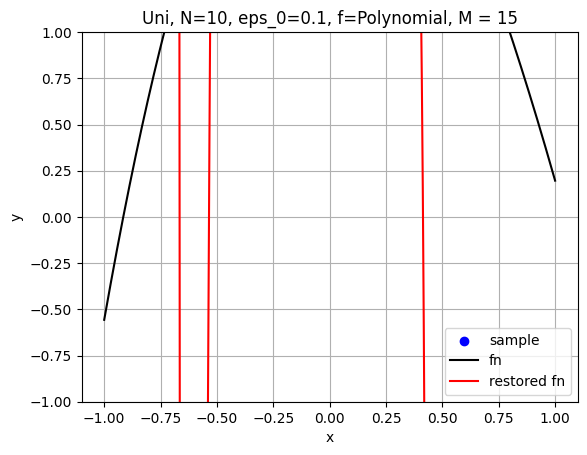

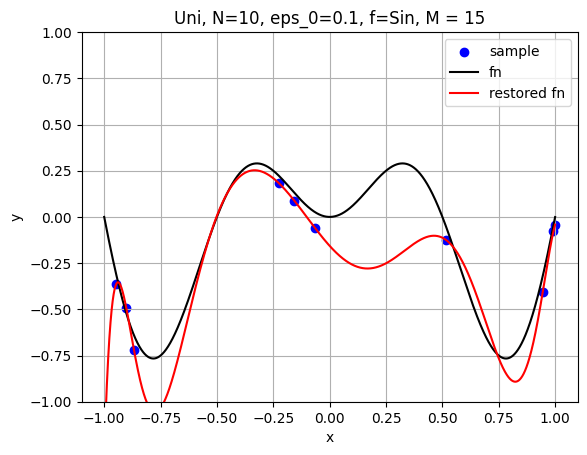

In [ ]:
for n in N:
  for eps in eps0:
    for f,f_name in fns:
      (x,y) = prepare_uniform_dataset(
          n = n,
          left = left,
          right = right,
          fn = f,
          eps0 = eps
      )
      w = find_weights(x,y,M)
      approx = lambda x: polyval(x, w)
      plt.ylim(-5,5)
      # plt.xlim(-0.0,0.1)
      draw(x, y, f, approx, bound, step, f"Uni, N={n}, eps_0={eps}, f={f_name}, M = {M}")

# for n in N:
#   for sig in sigma:
#     for f,f_name in fns:
#       (x,y) = prepare_normal_dataset(
#           n = n,
#           left = left,
#           right = right,
#           fn = f,
#           mu = 0,
#           sigma = sig
#       )
#       w = find_weights(x,y,M)
#       approx = lambda x: polyval(x, w)
#       plt.ylim(-1,1)
#       plt.xlim(-0.0,0.1)
#       draw(x, y, f, approx, bound, step, f"Normal, N={n}, sigma={sig}, f={f_name}, M={M}")


